# Project final:

Team:
- Kiều Hải Đăng - 19127347
- Lã Minh Hiếu - 19127400

## 1. Collecting data:

**1.1 The subject of data:**

- The dataset about TED Talks on the TED.com

**1.2 The origin of data:**
- We get dataset form [kaggle.](https://www.kaggle.com/rounakbanik/ted-talks?select=ted_main.csv)

**1.3 The licence of data:**
- The licence is [CC BY-NC-SA 4.0.](https://creativecommons.org/licenses/by-nc-sa/4.0/)

**1.4 How did authors collect data?**
- The data has been scraped from the official TED Website.

**1.5 Data describtion**
- These datasets contain information of all audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017. 


## Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import json
import ast
import datetime as dt

## 2. Exploring data

- How many rows and how many columns?
- What is the meaning of each row?

    - Are there **duplicated** rows?
    - What is the meaning of each column?
    - What is the current data type of each column? Are there columns having inappropriate data types?
    
    - With each **numerical** column, how are values distributed?
        - What is the percentage of missing values?
        - Min? max? Are they abnormal?
        
    - With each **categorical** column, how are values distributed?
        - What is the percentage of missing values?
        - How many different values? Show a few
        - Are they abnormal?

### Read data from csv to dataframe 

In [2]:
ted_df = pd.read_csv('ted_main.csv')
ted_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


### How many rows and columns does the data have?

In [3]:
n_rows, n_cols = ted_df.shape
n_rows, n_cols

(2550, 17)

### What is the meaning of each row?

Each row represents for a video/audio on ted.com

### Are there duplicated rows

In [4]:
ted_df.duplicated().any()

False

### What is the meaning of each column?

There are the description of each column in [kaggle.](https://www.kaggle.com/rounakbanik/ted-talks?select=ted_main.csv)

- **comments**: The number of first level comments made on the talk
- **description**: A blurb of what the talk is about
- **duration**: The duration of the talk in seconds
- **event**: The TED/TEDx event where the talk took place
- **film_date**: The Unix timestamp of filming
- **languages**: The number of languages in which the talk is available
- **main_speaker**: The first named speaker of the talk
- **name**: The official name of the TED Talk. Includes the title and speaker
- **num_speaker**: The number of speakers in the talk
- **published_date**: The Unix timestamp for the publication of the talk on TED.com
- **ratings**: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
- **related_talk**: A list of dictionaries of recommended talks to watch next
- **speaker_occupation**: The occupation of the main speaker
- **tags**: The themes associated with the talk
- **title**: The title of the talk
- **url**: The URL of the talk
- **views**: The number of views on the talk

### What is the current data type of each column? Are there columns having inappropriate data types?

In [5]:
col_dtypes = ted_df.dtypes
col_dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

`ted_df` has 10 columns which have `object` data types:
- "description","event","main_speaker","name","ratings","related_talks","speaker_occupation","tags","title","url".
- However, 
    - "ratings" now is a string `{'id': 7, 'name': 'Funny', 'count': 19645}`, need to convert to list of dictionary
    - "tags" now is a string, but actually it's a list.
- "film_date" and "published_date" is `int64` data type.

### With each numerical column
- What is the percentage of missing values?
- Min? max? Are they abnormal?

### Transform the data type of "film_date" and "published_date" to dataframe

In [6]:
ted_df['film_date'] = pd.to_datetime(ted_df['film_date'],unit='s')
ted_df['published_date'] = pd.to_datetime(ted_df['published_date'],unit='s')

**Convert to list function**

In [7]:
def convert_to_list(x):
    return ast.literal_eval(x)

### Transform the data type of "ratings" to list of dict

In [8]:
ted_df['ratings'] = ted_df['ratings'].apply(lambda x : convert_to_list(x))

In [9]:
def get_total_ratings(x):
    total = 0
    for i in x:
        total = total + i['count']
    return total
ted_df['total_ratings'] = ted_df['ratings'].apply(lambda x : get_total_ratings(x))

In [10]:
def missing_ratio(s):
    return s.isna().mean()*100
num_cols = ted_df[['comments','film_date','duration','languages','num_speaker','published_date','views','total_ratings']]
num_col_profiles_df = num_cols.agg([missing_ratio,pd.Series.min,pd.Series.max])
num_col_profiles_df

,comments,film_date,duration,languages,num_speaker,published_date,views,total_ratings
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.0,1972-05-14 00:00:00,135.0,0.0,1.0,2006-06-27 00:11:00,50443.0,68.0
max,6404.0,2017-08-27 00:00:00,5256.0,72.0,5.0,2017-09-22 15:00:22,47227110.0,93850.0


min, max are not abnormal.

### With each categorical column
- What is the percentage of missing values?
- How many different values? Show a few
- Are they abnormal?

In [11]:
def unique_not_nan(s):
    return s.dropna().unique()
cate_cols = ted_df[["description","event",
                    "main_speaker","name","related_talks",
                    "speaker_occupation",
                    "tags","title","url"]]
cate_col_profiles_df = cate_cols.agg([missing_ratio,pd.Series.nunique,unique_not_nan])
cate_col_profiles_df.index = ["missing_ratio", "num_diff_vals", "diff_vals"]
cate_col_profiles_df

,description,event,main_speaker,name,related_talks,speaker_occupation,tags,title,url
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.235294,0.0,0.0,0.0
num_diff_vals,2550,355,2156,2550,2550,1458,2530,2550,2550
diff_vals,[Sir Ken Robinson makes an entertaining and pr...,"[TED2006, TED2004, TED2005, TEDGlobal 2005, TE...","[Ken Robinson, Al Gore, David Pogue, Majora Ca...","[Ken Robinson: Do schools kill creativity?, Al...","[[{'id': 865, 'hero': 'https://pe.tedcdn.com/i...","[Author/educator, Climate advocate, Technology...","[['children', 'creativity', 'culture', 'dance'...","[Do schools kill creativity?, Averting the cli...",[https://www.ted.com/talks/ken_robinson_says_s...


In [12]:
ted_df.sample(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,total_ratings
1976,109,Roman Mars is obsessed with flags -- and after...,1098,TED2015,2015-03-25,23,Roman Mars,Roman Mars: Why city flags may be the worst-de...,1,2015-05-14 15:12:54,"[{'id': 25, 'name': 'OK', 'count': 132}, {'id'...","[{'id': 43, 'hero': 'https://pe.tedcdn.com/ima...",Digital storyteller,"['cities', 'design', 'government', 'humor', 'p...",Why city flags may be the worst-designed thing...,https://www.ted.com/talks/roman_mars_why_city_...,4597270,2748
889,239,We think of space as a silent place. But physi...,1063,TED2011,2011-03-01,30,Janna Levin,Janna Levin: The sound the universe makes,1,2011-03-15 14:09:00,"[{'id': 1, 'name': 'Beautiful', 'count': 183},...","[{'id': 326, 'hero': 'https://pe.tedcdn.com/im...",Physicist,"['dark matter', 'science', 'universe']",The sound the universe makes,https://www.ted.com/talks/janna_levin_the_soun...,1119772,1878


## 3. Asking meaningful questions

- What is the question?
- What are benefits of finding the answer?
- What is the most popular subject in each year?

1. How is the distribution of the number of events over the years? Anything unusual? make a comment.
2. Which profession will have the most views when giving a presentation? Does that view depend on the character's reputation, money, or status?
3. Which video has the most video through each year?
4. The distribution of video genres by year? From there draw comments.

## 4. Preprocessing + analyzing data to answer each question

### Transform the data type of "tags" to list

In [13]:
ted_df['tags'] = ted_df['tags'].apply(lambda x: convert_to_list(x))

### Add published year column

In [14]:
ted_df['Year_published'] = ted_df['published_date'].dt.year

#### 1. How is the distribution of the number of events over the years? Anything unusual? make a comment.

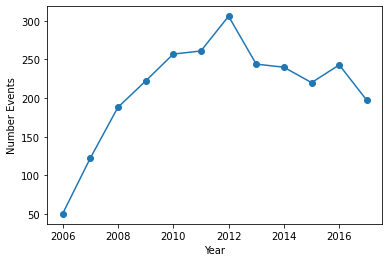

In [15]:
Q1 = ted_df.groupby('Year_published')['event'].count()
Q1.plot.line(ylabel = 'Number Events', xlabel = 'Year', marker='o');

#### 2. Which profession will have the most views when giving a presentation? Does that view depend on the character's reputation, money, or status?

### Data processing (continue): Ratings

**Distribution of the number of ratings for video**

In [16]:
def arr_name(x):
    a = []
    for i in x:
       
        a.append(i['name'])
    return a
ted_df['list_name_rating'] = ted_df['ratings'].apply(lambda x : arr_name(x))

In [17]:
df_ratings = ted_df.apply(lambda x: pd.Series(x['list_name_rating']),axis=1).stack().reset_index(level=1,drop=True)
df_ratings.name = 'name_rating'
df_ratings  = ted_df.join(df_ratings)
df_ratings.value_counts('name_rating')

name_rating
Beautiful       2550
Confusing       2550
Courageous      2550
Fascinating     2550
Funny           2550
Informative     2550
Ingenious       2550
Inspiring       2550
Jaw-dropping    2550
Longwinded      2550
OK              2550
Obnoxious       2550
Persuasive      2550
Unconvincing    2550
dtype: int64

- As we can see, the distribution of the number of kind of ratings for each video is even. And we have 14 kinds of ratings for the video:
    - `Beautiful, Courageous, Fascinating, Funny, Informative, Ingenious, Inspiring, Jaw-dropping, OK, Persuasive` are a positive ratings.
    - `Confusing, Longwinded, Obnoxious, Unconvincing` are a negative ratings.


#### 3. Ranking kinds of rating for video
- Step 1: Add column which is a counting of each rating for each video
- Step 2: Calculate the sum of each column (kinds of rating)
- Step 3: Visualize with bar horizontal

**Step 1:** Add column which is a counting of each rating for each video

In [18]:
def count_rating(x,column):
    for i in x:
        if i['name'] == column:
            return i['count']
name_columns = df_ratings.value_counts('name_rating').index
for i_name in name_columns:
    ted_df[f'{i_name}_ratings'] = ted_df['ratings'].apply(lambda x: count_rating(x,i_name))

**Step 2:** Calculate the sum of each column (kinds of rating) and sort dictionary `a`

In [19]:
a = {}
for i_name in name_columns:
    a[f'{i_name}'] = ted_df[f'{i_name}_ratings'].sum()
a = dict(sorted(a.items(), key=lambda item: item[1]))

**Step 3:** Visualize with bar horizontal

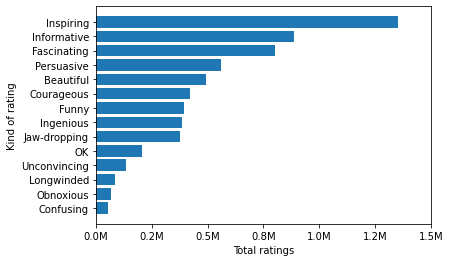

In [20]:
def millions(x, pos):
    return '{:1.1f}M'.format(x*1e-6)
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(millions)
ax.barh(list(a.keys()),list(a.values()))
plt.xlabel('Total ratings')
plt.ylabel('Kind of rating')
plt.xticks([0,250000,500000,750000,1000000,1250000,1500000])
plt.show()


**Comment:**
- Most of the video on `ted.com` have a good content to inspire, give a lot of information for everybody, ...
- A little video have longwinded, unconvincing, obnoxious, confusing.
- However, I think `ted.com` is a powerful website for everybody to learn new things or entertain.

#### 4. Which video has the most ratings of inspiring through each year?
---**Step to deal with this question**---

- Step 1: Group by `Year_published` and `title`
- Step 2: Unstack the data grouped by with each column is the number of inspiring ratings by year published of each video
- Step 3: Find the highest ratings of video in year


In [21]:
ratings = ted_df[['Year_published','title','Inspiring_ratings']]
most_video_by_year = ratings.groupby(['Year_published','title']).sum()
most_video_by_year = most_video_by_year.unstack(0)
most_video_by_year
most_video_by_year = most_video_by_year.idxmax(axis=0).to_frame() 
most_video_by_year.columns = ['title']
detail_most_video_by_year = most_video_by_year.merge(ratings)
detail_most_video_by_year

,title,Year_published,Inspiring_ratings
0,Do schools kill creativity?,2006,24924
1,The habits of happiness,2007,3774
2,My stroke of insight,2008,16918
3,The danger of a single story,2009,9566
4,How great leaders inspire action,2010,21564
5,How to live before you die,2011,17290
6,Your body language may shape who you are,2012,21210
7,Every kid needs a champion,2013,5946
8,Why good leaders make you feel safe,2014,8569
9,Why we all need to practice emotional first aid,2015,13398


**Add column named "positive_ratings:"** is about the positive ratings

In [22]:
def count_positive_rating(x):
    for i in x:
        if i['name'] in ['Beautiful', 'Courageous',
                         'Fascinating', 'Funny',
                         'Informative', 'Ingenious',
                         'Inspiring', 'Jaw-dropping',
                         'OK', 'Persuasive'] :
            return i['count']
ted_df['positive_ratings'] = ted_df['ratings'].apply(lambda x: count_positive_rating(x))

**Add column named "negative_ratings:"** is about the negative ratings

In [23]:
def count_negative_rating(x):
    for i in x:
        if i['name'] in ['Confusing', 'Longwinded', 'Obnoxious', 'Unconvincing'] :
            return i['count']
ted_df['negative_ratings'] = ted_df['ratings'].apply(lambda x: count_negative_rating(x))

**Group by data by "Year_published" to visualize the positive ratings and negative ratings through each year**

In [49]:
groupby_year = ted_df.groupby('Year_published').sum()

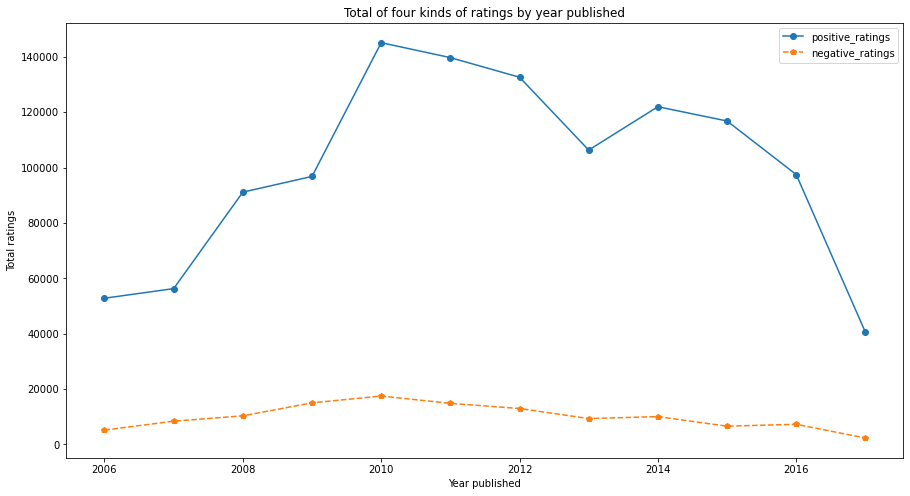

In [51]:
plt.figure(figsize=(15,8))
plt.plot(groupby_year['positive_ratings'], label ='positive_ratings',marker='o',linestyle='solid')
plt.plot(groupby_year['negative_ratings'], label ='negative_ratings',marker='p',linestyle='dashed')
plt.xlabel('Year published')
plt.ylabel('Total ratings')
plt.title('Total of four kinds of ratings by year published')
plt.legend();

**Comment:**
- As we can see, the total number of positive ratings is many times more than negative ratings.
- Most video on `ted.com` have a positive ratings. A lot of content which inspire, give a lot of information for everyone who need to find something news, to get new knowledges.
- In the number of positive ratings, from 2006 to 2010, there is an upward trend in positive ratings. After that, there is a downward trend to 2017. I think the the video uploaded in advance will have more rating than the new one

#### 4. Tags

In [ ]:
df_tags = ted_df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1,drop=True)
df_tags.name = 'tag'
df_tags  = ted_df.drop('tags', axis=1).join(df_tags)
df_tags

## 5. Conclusion

## 6. Reflection

- Each member: What difficulties have you encountered?
- Each member: What have you learned?
- Your group: If you had more time, what would you do?

## 7. Reference
1. [Data set](https://www.kaggle.com/rounakbanik/ted-talks).
2. https://gocnhintangphat.com/timestamp-la-gi/.
3. https://rstudio-pubs-static.s3.amazonaws.com/321337_38458c80a3fb4edf8755e8bce876e822.html.\n
4. https://stackoom.com/en/question/3w6dO.
5. https://www.guru99.com/python-json.html.
6. https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html.
7. https://pretagteam.com/question/how-to-replace-special-characters-in-a-string-python.